<a href="https://colab.research.google.com/github/wsx5031060310guy/python-project/blob/master/OpenFOAM_DamBreak_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. OpenFOAMのインストール

In [ ]:
%%bash
sh -c "wget -O - http://dl.openfoam.org/gpg.key | apt-key add -"
add-apt-repository http://dl.openfoam.org/ubuntu
apt-get update
apt-get -y install openfoam9
# pip install PyFoam
pip3 install vtk

OK
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://dl.openfoam.org/ubuntu bionic InRelease [6,354 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://ppa.launchpad.net/graphics-drivers/pp

--2022-05-22 04:25:42--  http://dl.openfoam.org/gpg.key
Resolving dl.openfoam.org (dl.openfoam.org)... 35.179.33.128
Connecting to dl.openfoam.org (dl.openfoam.org)|35.179.33.128|:80... connected.
HTTP request sent, awaiting response... Warning: apt-key output should not be parsed (stdout is not a terminal)
200 OK
Length: 1710 (1.7K) [application/pgp-keys]
Saving to: ‘STDOUT’

     0K .                                                     100%  246M=0s

2022-05-22 04:25:42 (246 MB/s) - written to stdout [1710/1710]



In [ ]:
import os, shlex, subprocess, shutil

#shellで実行するコマンド
command = shlex.split(
    "env -i bash -c 'source /opt/openfoam9/etc/bashrc && env'")

#shellで実行
proc = subprocess.Popen(command, stdout = subprocess.PIPE)
#実行結果を格納
stdout_data, stderr_data = proc.communicate()
# print(stdout_data,'\n',stderr_data)
#標準出力を1行ずつ抽出
for l in stdout_data.decode('utf-8').split("\n"):
    try:
        key, value = l.split("=")
        os.environ[key] = value #環境変数にセット
    except Exception as e:
        pass #print(e) #例外を知りたいとき

# 2. 計算Caseを準備

In [ ]:
%%bash
. /opt/openfoam9/etc/bashrc
cp -r $FOAM_TUTORIALS/multiphase/interFoam/laminar/damBreak/damBreak .

In [ ]:
%cd ./damBreak

/content/damBreak


# 3. 計算実行

In [ ]:
%%bash
. /opt/openfoam9/etc/bashrc
blockMesh
cp 0/alpha.water.orig 0/alpha.water
setFields
interFoam
ls

/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  9
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 9-b456138dc4bc
Exec   : blockMesh
Date   : May 22 2022
Time   : 04:27:18
Host   : "c41d68992312"
PID    : 4110
I/O    : uncollated
Case   : /content/damBreak
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
Create time

Reading "blockMeshDict"

Creating block mesh from
    "system/blockMeshDict"
Creating bloc

In [ ]:
!foamToVTK

/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  9
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 9-b456138dc4bc
Exec   : foamToVTK
Date   : May 22 2022
Time   : 04:27:28
Host   : "c41d68992312"
PID    : 4131
I/O    : uncollated
Case   : /content/damBreak
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
Create time

Create mesh for time = 0

Time: 0
    volScalarFields            : p_rgh alpha.water
    v

In [ ]:
!ls VTK

atmosphere	  damBreak_232.vtk  damBreak_412.vtk  damBreak_86.vtk
damBreak_0.vtk	  damBreak_262.vtk  damBreak_443.vtk  defaultFaces
damBreak_108.vtk  damBreak_304.vtk  damBreak_470.vtk  leftWall
damBreak_130.vtk  damBreak_30.vtk   damBreak_498.vtk  lowerWall
damBreak_15.vtk   damBreak_343.vtk  damBreak_522.vtk  rightWall
damBreak_173.vtk  damBreak_366.vtk  damBreak_539.vtk
damBreak_209.vtk  damBreak_387.vtk  damBreak_61.vtk


# 4. 可視化

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import vtk
from vtk.util.numpy_support import vtk_to_numpy
from scipy.interpolate import griddata
from ipywidgets import interact

filename = "VTK/damBreak_0.vtk"

reader = vtk.vtkUnstructuredGridReader()
reader.SetFileName(filename)
reader.Update()
data = reader.GetOutput()

# cell data から point data変換
cell2point = vtk.vtkCellDataToPointData()
cell2point.SetInputData(reader.GetOutput())
cell2point.Update()
# 座標データの配列化
# points = data.GetPoints()
# coord = vtk_to_numpy(points.GetData()) # (x,y,z)座標の2次元配列
coord = vtk_to_numpy(cell2point.GetOutput().GetPoints().GetData())

x = coord[:,0]
y = coord[:,1]
z = coord[:,2]

# メッシュグリッド用
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)
xi = np.linspace(xmin, xmax, 100)
yi = np.linspace(ymin, ymax, 100)

In [ ]:
def plotVtk(t,isShow=True):
  filename = f'VTK/damBreak_{t}.vtk'

  reader = vtk.vtkUnstructuredGridReader()
  reader.SetFileName(filename)
  reader.Update()
  data = reader.GetOutput()

  # cell data から point data変換
  cell2point = vtk.vtkCellDataToPointData()
  cell2point.SetInputData(reader.GetOutput())
  cell2point.Update()

  # GetAbstractArray(0)は圧力、GetAbstractArray(1)は速度ベクトルデータ
  # p = vtk_to_numpy(cell2point.GetOutput().GetPointData().GetAbstractArray(0))
  alpha = vtk_to_numpy(cell2point.GetOutput().GetPointData().GetAbstractArray('alpha.water'))
  # print('alpha:',alpha)
  # print('0:',cell2point.GetOutput().GetPointData().GetArrayName(0))
  # print('1:',cell2point.GetOutput().GetPointData().GetArrayName(1))
  # print('2:',cell2point.GetOutput().GetPointData().GetArrayName(2))
  # print('3:',cell2point.GetOutput().GetPointData().GetArrayName(3))
  # print('4:',cell2point.GetOutput().GetPointData().GetArrayName(4))
  # u = vtk_to_numpy(cell2point.GetOutput().GetPointData().GetAbstractArray(3))
  # speed = np.sqrt(u[:,0]**2 + u[:,1]**2) # ベクトルをスカラー値に変換
  # U = u[:,0] # ベクトルをスカラー値に変換
  # V = u[:,1] # ベクトルをスカラー値に変換

  # 圧力のコンター図出力
  # levels = np.linspace(-5,5,21) # 描画する範囲の設定(最小，最大，色の分割数)
  # plt.tricontourf(x,y,p,levels=levels,cmap="jet",vmin=-5, vmax=5) #vmin,vmax で色の範囲を設定
  # cbar = plt.colorbar()
  # cbar.set_ticks(np.arange(-5,5.1,0.5)) # カラーバーの目盛り
  # cbar.set_label("p")
  # plt.show()

  # 流速のコンター図出力
  # levels = np.linspace(-1,1,21)
  # plt.tricontourf(x,y,U,levels=levels,cmap="jet", vmin=-1, vmax=1)
  # cbar = plt.colorbar()
  # cbar.set_ticks(np.arange(-1.0,1.01,0.1))
  # cbar.set_label("U")
  # # plt.quiver(x,y,U,V,color='red',angles='xy',scale_units='xy', scale=10.0) #長さでベクトル場を可視化
  # plt.quiver(x,y,U/speed,V/speed,speed,cmap='jet',scale=15.0) #カラーマップでベクトル場を可視化
  # # plt.streamplot(x,y,U/speed,V/speed,color=speed,cmap='jet')
  # plt.show()

  # 流線出力
  # levels = np.linspace(0,1,21)
  # velocity = griddata((x, y), u, (xi[None,:], yi[:,None]), method='linear') # 速度ベクトルをグリッドに合わせて線形補間
  # speed2 = np.sqrt(velocity[:,:,0]**2 + velocity[:,:,1]**2)
  # strm = plt.streamplot(xi, yi, velocity[:,:,0], velocity[:,:,1], linewidth=1, arrowstyle="-", density=1.5)
  # plt.tricontourf(x,y,speed,levels=levels,cmap="jet", vmin=0, vmax=1)
  # cbar = plt.colorbar()
  # cbar.set_ticks(np.arange(0,1.01,0.1))
  # cbar.set_label("|u|")
  # plt.show()

  # alphaのコンター図出力
  plt.axes().set_aspect('equal')
  levels = np.linspace(-0.01,1.01,21) # 描画する範囲の設定(最小，最大，色の分割数)
  plt.tricontourf(x,y,alpha,levels=levels,cmap="RdBu_r",vmin=-0.01, vmax=1.01) #vmin,vmax で色の範囲を設定
  cbar = plt.colorbar()
  cbar.set_ticks(np.arange(0,1.1,0.1)) # カラーバーの目盛り
  cbar.set_label("alpha")
  if isShow:
    plt.show()
  else:
    plt.savefig(f'VTK/damBreak_{t:03}.png')
    plt.close()


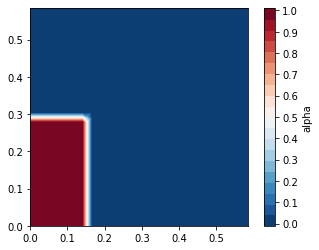

In [ ]:
plotVtk(t=0)

In [ ]:
times = [0,15,30,61,86,108,130,173,209,232,262,304,343,366,387,412,443,470,498,522,539]

for t in times:
  plotVtk(t=t,isShow=False)

In [ ]:
!ls VTK/

atmosphere	  damBreak_173.png  damBreak_343.vtk  damBreak_498.vtk
damBreak_000.png  damBreak_173.vtk  damBreak_366.png  damBreak_522.png
damBreak_015.png  damBreak_209.png  damBreak_366.vtk  damBreak_522.vtk
damBreak_030.png  damBreak_209.vtk  damBreak_387.png  damBreak_539.png
damBreak_061.png  damBreak_232.png  damBreak_387.vtk  damBreak_539.vtk
damBreak_086.png  damBreak_232.vtk  damBreak_412.png  damBreak_61.vtk
damBreak_0.vtk	  damBreak_262.png  damBreak_412.vtk  damBreak_86.vtk
damBreak_108.png  damBreak_262.vtk  damBreak_443.png  defaultFaces
damBreak_108.vtk  damBreak_304.png  damBreak_443.vtk  leftWall
damBreak_130.png  damBreak_304.vtk  damBreak_470.png  lowerWall
damBreak_130.vtk  damBreak_30.vtk   damBreak_470.vtk  rightWall
damBreak_15.vtk   damBreak_343.png  damBreak_498.png


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from PIL import Image
import glob

files = sorted(glob.glob('VTK/*.png'))
images = list(map(lambda file : Image.open(file) , files))
images[0].save('VTK/damBreak.gif' , save_all = True , append_images = images[1:] , duration = 200 , loop = 0)

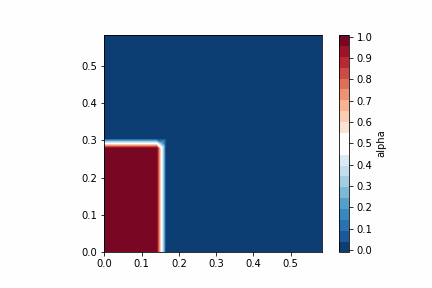

In [ ]:
from IPython import display
from pathlib import Path

gifPath = Path("VTK/damBreak.gif")

with open(gifPath,'rb') as f:
  display.Image(data=f.read(), format='png')

In [ ]:
from google.colab import files
files.download('VTK/damBreak.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>